In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print(train.shape)
print(test.shape)
print(train["Survived"].value_counts())
train.head()

(891, 12)
(418, 11)
0    549
1    342
Name: Survived, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
def df_stats(df, name="Train", label="Survived"):
    print("Stats for", name, "Data")
    print("Shape :", df.shape)
    print("Duplications", df.duplicated().sum())
    print("\nNull Values")
    print(df.isnull().sum())
    print("\nDescription")
    print(df.describe())
    print("\nSample Values")
    print(df.head())
    if name.lower()=="train":
        print("Target Distribution")
        print(df[label].value_counts())
df_stats(train)

Stats for Train Data
Shape : (891, 12)
Duplications 0

Null Values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.00000

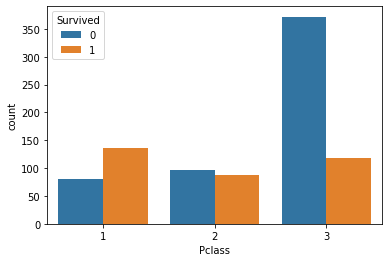

In [22]:
#Pclass -> Categorical Data
sns.countplot(x="Pclass", hue="Survived", data=train)

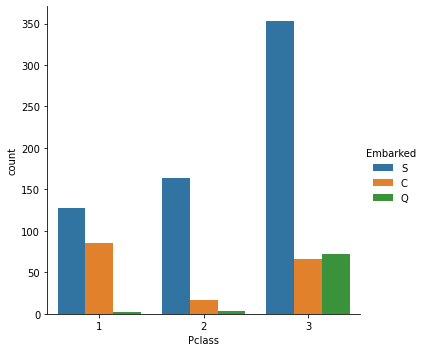

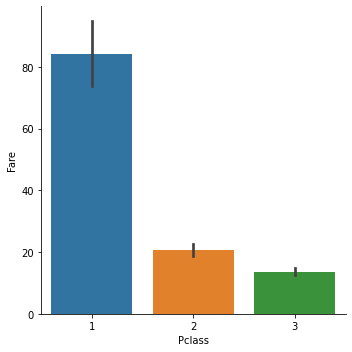

In [23]:
#Pclass wrt to port and fare
sns.catplot(x="Pclass", hue="Embarked", kind="count", data=train)
plt.show()
sns.catplot(x="Pclass", y="Fare", kind="bar", data=train)
plt.show()

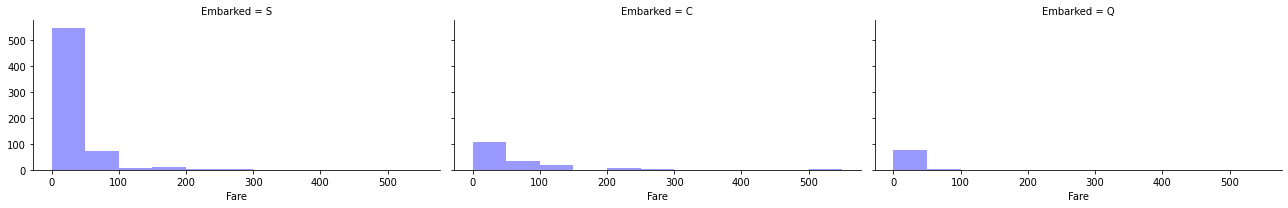

In [24]:
#who paid lowest fare
bins=np.arange(0, 600, 50)
g=sns.FacetGrid(col="Embarked", data=train, height = 3, aspect=2)
g.map(sns.distplot, "Fare", kde=False, bins=bins, color="b")

In [25]:
#etract prefix from names
tr_names = train["Name"].apply(lambda x : x.split(", ")[1].split(".")[0])
print(tr_names.value_counts())
ts_names = test["Name"].apply(lambda x : x.split(", ")[1].split(".")[0])
print(ts_names.value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
Sir               1
Capt              1
the Countess      1
Mme               1
Lady              1
Ms                1
Jonkheer          1
Name: Name, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Name, dtype: int64


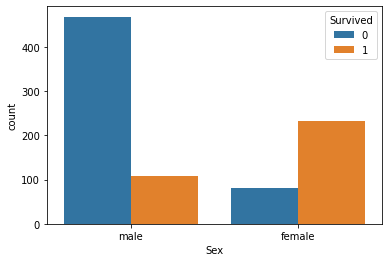

In [26]:
#sex
sns.countplot(x="Sex", hue="Survived", data=train)

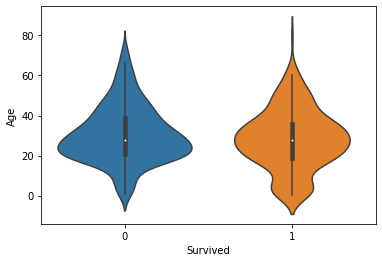

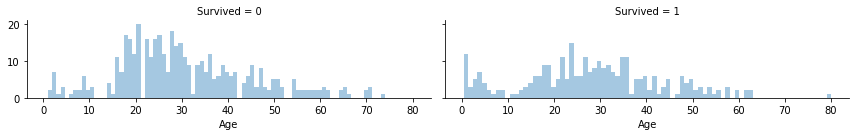

In [27]:
#age
sns.violinplot(x="Survived", y="Age", data=train)
plt.show()
g = sns.FacetGrid(col="Survived", data=train, height = 2, aspect=3)
g.map(sns.distplot, "Age", kde=False, bins=80)
plt.show()

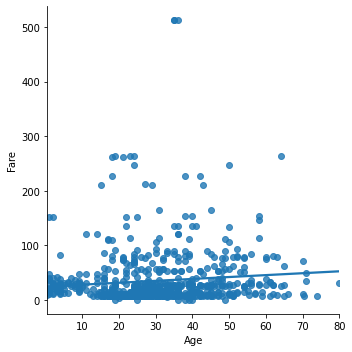

In [28]:
#trying to figure a regression model for imssing values of age
sns.lmplot(x='Age', y='Fare', data=train, ci=None)

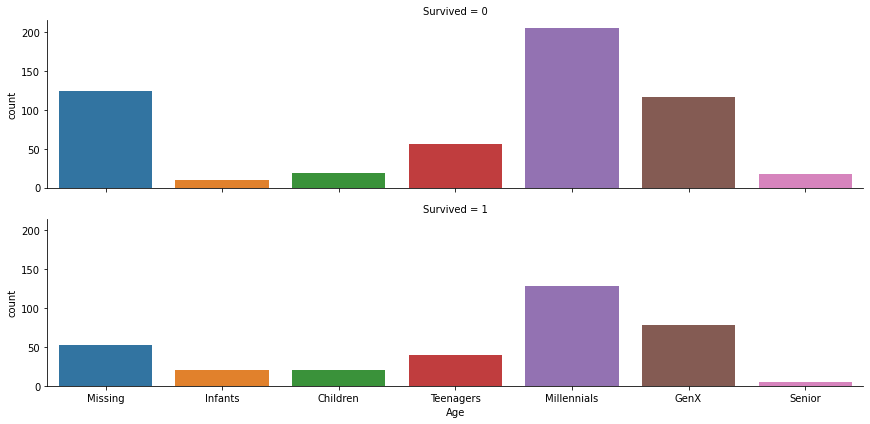

In [29]:
#young people have better survival rate better
def age_to_cat(df):
    df["Age"] = df["Age"].fillna(-1)
    cut_values=[-2, 0, 3, 12, 19, 35, 60, 80]
    label_names=["Missing", "Infants", "Children", "Teenagers", "Millennials", "GenX", "Senior"]
    df["Age"]=pd.cut(df["Age"], bins=cut_values, labels=label_names)
    return df
train = age_to_cat(train)
sns.catplot(x="Age", row="Survived", kind="count", height=3, aspect=4, data=train)
plt.show()

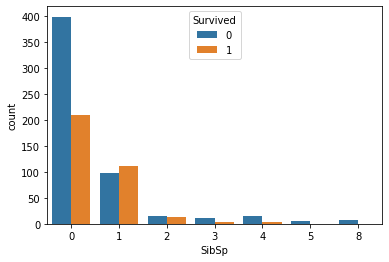

In [30]:
sns.countplot(x="SibSp", hue="Survived", data=train)

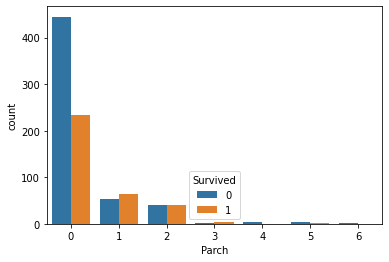

In [31]:
sns.countplot(x="Parch", hue="Survived", data=train)

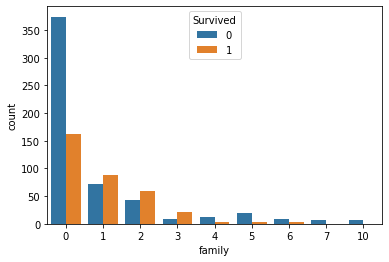

In [32]:
#siblings and parents can be combined as one feature, family
train["family"] = train["SibSp"] + train["Parch"]
sns.countplot(x="family", hue="Survived", data=train)
plt.show()
#can be converted to categorical values

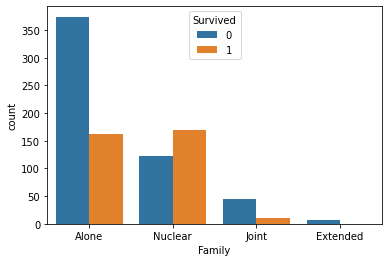

In [33]:
def sp_to_fam(df):
    df["Family"] = df.pop("SibSp") + df.pop("Parch")
    cut_values=[-1, 0, 3, 7, 15]
    label_names=["Alone", "Nuclear", "Joint", "Extended"]
    df["Family"]=pd.cut(df["Family"], bins=cut_values, labels=label_names)
    return df
train = sp_to_fam(train)
sns.countplot(x="Family", hue="Survived", data=train)
plt.show()

In [34]:
train["Ticket"].value_counts()
#doesn't seem to add any value

CA. 2343         7
347082           7
1601             7
CA 2144          6
3101295          6
                ..
111240           1
C.A. 31026       1
F.C. 12750       1
SC/PARIS 2167    1
345779           1
Name: Ticket, Length: 681, dtype: int64

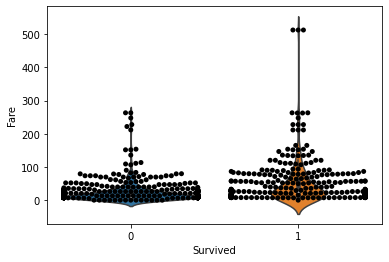

In [16]:
sns.violinplot(x="Survived", y="Fare", data=train)
sns.swarmplot(x='Survived', y='Fare', data=train, color='k')
plt.show()
#can be divided into groups usng quantiles

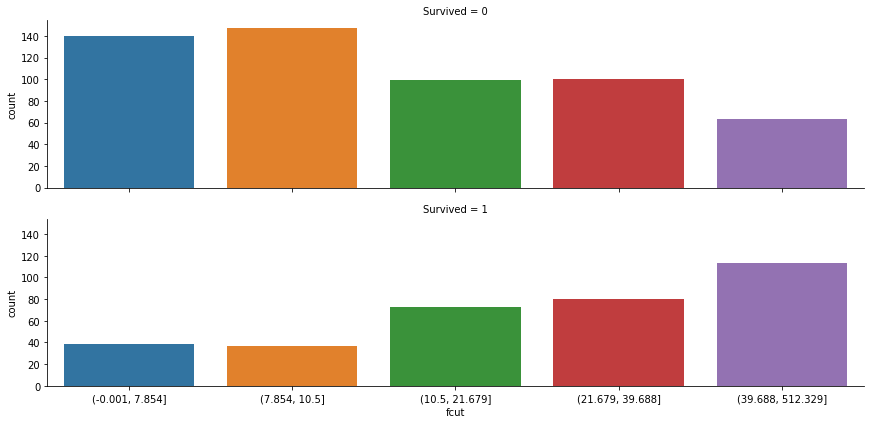

In [17]:
train['fcut'] = pd.qcut(train["Fare"], 5)
sns.catplot(x="fcut", row="Survived", kind="count", height=3, aspect=4, data=train)
plt.show()

In [25]:
train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
E12            1
A19            1
D50            1
B69            1
E68            1
Name: Cabin, Length: 147, dtype: int64

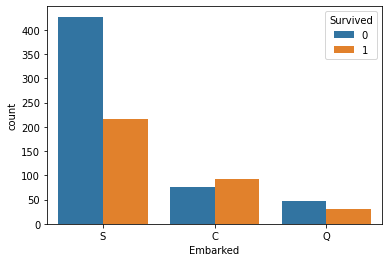

In [35]:
sns.countplot(x="Embarked", hue="Survived", data=train)